# Convex Hull Algorithms Comparison

This notebook compares four different convex hull algorithms:
1. Graham's Scan (Incremental)
2. Gift Wrapping (Jarvis' March)
3. Divide and Conquer
4. Quickhull

We'll generate test points, implement the algorithms, plot the results, and compare execution times.

## IMPORTS

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from time import time
import operator
from prettytable import PrettyTable

## Helper Functions

Plotting function

In [13]:
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
def plot_hull(points, hulls, title, x_step=5, y_step=5):
    plt.figure(figsize=(12, 12))
    plt.scatter(points[:, 0], points[:, 1], c='b', label='Points',zorder=100)
    if not isinstance(hulls,list):
        hulls = [hulls]
    for hull in hulls:   
        # pointA = hull[0]
        # print(hull[:,0])
        # print(hull[:,1])
        # print(hull[0,0])
        # print(hull[0,1])
        # plt.plot(hull[:,0], hull[:,1], 'r-', label='Convex Hull')
        plot_points = hull[np.arange(hull.shape[0]+1)%hull.shape[0]]
        # plot_points = np.vstack((hull,hull[0]))
        # print(plot_points)
        plt.plot(plot_points[:,0],plot_points[:,1], 'r-', label='Convex Hull')
    # plt.plot(hull[[0,-1],0], hull[[0,-1],1], 'r-')
    # print()
    # plt.plot(, 'r-')

    # for pointB in hull[1:]:
        # print(pointA, pointB)
        # plt.plot(pointA, pointB, 'r-')
        # pointA = pointB
        # plt.plot(point, point, 
    # plt.plot(hull[-1], hull[0][0]], [hull[-1][1], hull
    ax = plt.gca()
    ax.xaxis.set_major_locator(MultipleLocator(x_step))
    ax.yaxis.set_major_locator(MultipleLocator(y_step))
     # Set the minor ticks
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    
    # Enable the grid for minor ticks
    ax.grid(which='both')
    ax.grid(which='minor', linestyle='--', linewidth='0.5')
    ax.grid(which='major', linestyle='-', linewidth='1')
    plt.title(title)
    plt.legend()
    plt.show()

Metrics

In [3]:
def orientation(a, b, c):
    arr = np.array([b-a, c-a])
    det = np.linalg.det(arr)
    return det

def polar_angle(p0, p1):
        return np.arctan2(p1[1] - p0[1], p1[0] - p0[0])

def distance_sq(p0, p1):
    return np.sum((p1-p0)**2)
    # return np.sqrt((p1[0] - p0[0])**2 + (p1[1] - p0[1])**2)

Κατηγορήματα

In [4]:
def ccw(a, b, c): #counterclockwise
    return orientation(a, b, c) > 0

def cw(a, b, c): #clockwise
    return orientation(a, b, c) < 0

def colinear(a, b, c):
    return orientation(a, b, c) == 0
# arr = np.array([[1, 2], [3, 4], [5, 6]])
# arr

Ταξινόμηση

In [5]:
def polar_angle_sort(array, p, clockwise=False):
    for q in array:
        print(polar_angle(p, q))
    return np.array(sorted(array, key=lambda x:(polar_angle(p, x), distance_sq(p, x)), reverse=clockwise))

## Generate Test Points

In [6]:
# Set random seed for reproducibility
rng = np.random.default_rng(seed=37) # for reproducibility
def generate_points(n):
    # Generate n points in general position
    # points = np.random.rand(n, 2)
    # points = rng.random(0, 51, size=(n, 2))
    points = rng.integers(0, 100, size=(n, 2))
    return points

# Generate 120 points
all_points = generate_points(1000)
# print(all_points)
input_points = rng.choice(all_points,120,replace=False,shuffle=False)

## Υλοποίηση αλγορίθμων ΚΠ2

Αυξητικός Αλγόριθμος Graham's Scan

0.6965239885843404
0.8270407424960368
1.176005207095135
0.4182243295792291
1.3578579772154995
0.6055446636049701
0.5836358190771612
1.4416490366668766
0.7674360235495911
1.6295521495106193
0.4069707853687713
1.2167988899630005
0.5214344397717438
1.6666554739049098
1.360613740132727
0.44292518710832224
0.9907935525872157
0.35877067027057225
1.1071487177940904
0.28950367196138826
1.3909428270024184
0.5947592574833528
1.4789502005301591
0.27829965900511133
0.5713374798336268
1.1273479903751584
0.18763977180436625
0.9015397902774386
0.17985349979247828
1.0303768265243125
0.39852244566642026
0.5364354576047312
0.9318823417910095
1.1866269624022971
0.8621700546672264
0.8658691746629091
0.4372220437409879
0.0
0.7994817392203085
1.2090670852749643
0.6177557255662326
0.7257674502662789
1.1983978801181423
0.060532019782107135
1.2765617616837088
0.9882432605815417
1.04094725733883
0.3805063771123649
0.5924273534318787
0.2086817623350266
1.342522553556844
1.5350972141155728
0.7476802109305841
0.69

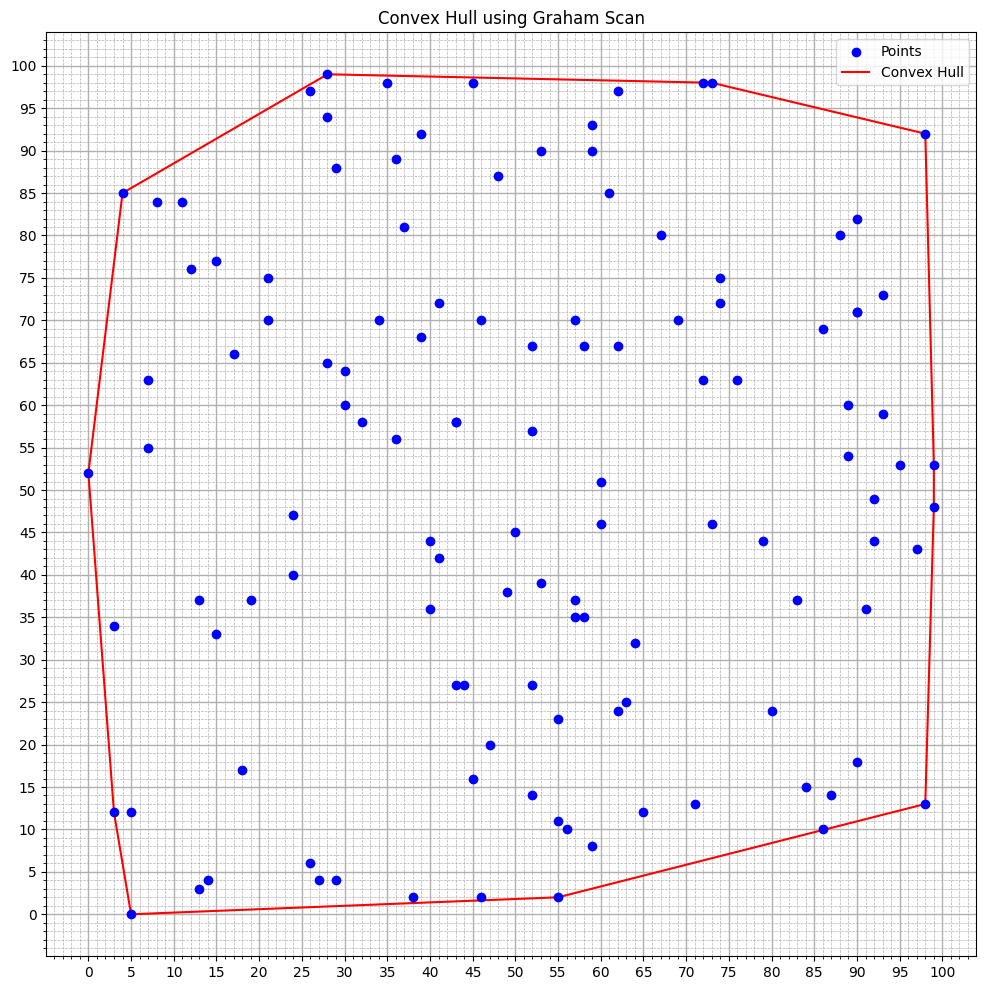

In [7]:
def graham_scan(points):
    if len(points) < 3:
        return points
    # start = min(point s, key=lambda p: (p[1], p[0]))
    start = min(points, key=operator.itemgetter(1,0))
    # print(start)
    # start = min(points, key=lambda p: (p[0], p[1]))
    # print(start)
    # start = min(points, key=lambda p: p[0])
    # sorted_points = np.array(sorted(points, key=lambda p: (polar_angle(start, p), distance_sq(start, p))))
    sorted_points = polar_angle_sort(points,start)
    # sorted_points = points[points[:,0].argsort()]
    # sorted_points = points[np.lexsort((distance(start,points), polar_angle(start, points)))]
    # sorted_points = points[np.lexsort((distance(start,points), polar_angle(start, points)))]
    # sorted_points = points[points[:,0].argsort()]
    # sorted_points = points[points[:,0].argsort()]
    # sorted_points = np.sort(points, axis=0)
    # sorted_points = sorted(points, key=lambda p: (p[1], p[0]))
    stack = [sorted_points[0], sorted_points[1]]
    # print(sorted_points)
    # print(points)
    # points.sort()
    # print(points)
    for point in sorted_points[2:]:
        # print(stack)
        while len(stack) > 1 and  (orientation := ccw(stack[-2],stack[-1],point)) <= 0:
            # if orientation == 0:
                # print("colinear:",stack[-2],stack[-1],point)
            stack.pop()
        stack.append(point)
    
    return np.array(stack)

# print(input_points)
# print(input_points[1:,0])    
# print(graham_scan(input_points))
# graham_scan(input_points)
hull = graham_scan(input_points)
# print("input points:\n",input_points)
# print("hull:\n",hull)
p1 = hull[0]
p2 = hull[1]
for x in hull[2:]:
    if ccw(p1,p2,x) == 0:
        print("colinear",p1,p2,x)
    p1 = p2
    p2 = x
# print(np.array([p2-p1,hull[0]-p1]))
plot_hull(input_points, hull, 'Convex Hull using Graham Scan')


Αλγόριθμος Περιτυλίγματος

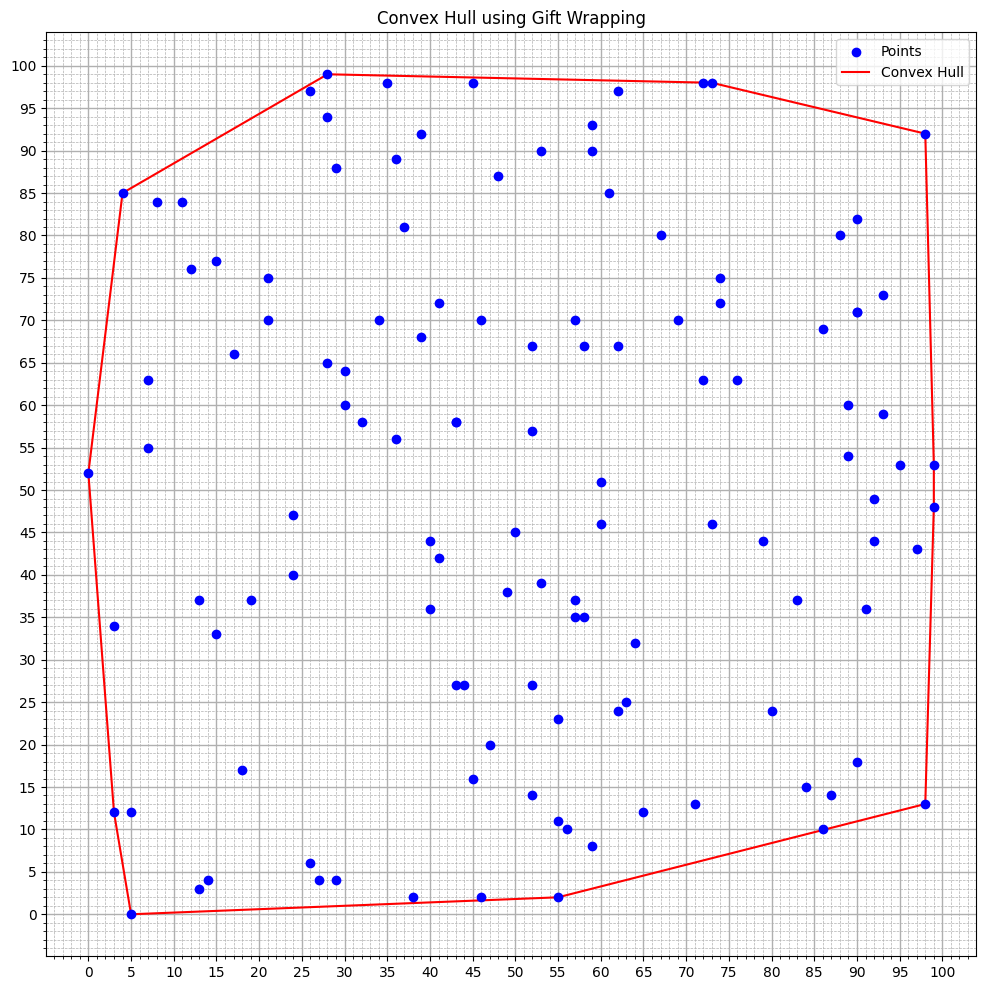

In [8]:
def gift_wrapping(points):
    n = points.shape[0]
    if n < 3:
        return points

    start = min(points, key=operator.itemgetter(1,0))
    hull = []
    # s = points.tolist()
    s = list(points)
    p = start
    while True:
        # print(s)

        hull.append(p)
        q = s[0]
        for r in s[1:]:
            if np.array_equal(p, q) or cw(p, q, r):
                q = r
        p = q 
        # s = s[1:]
        s.pop(0)
        if np.array_equal(p, start):
            break


    return np.array(hull)

hull = gift_wrapping(input_points)
# print(hull)
plot_hull(input_points, hull, 'Convex Hull using Gift Wrapping')

Αλγόριθμος Διαίρει και Βασίλευε

In [53]:
n = 120
mid = n//2
choice = rng.choice(input_points,n,replace=False,shuffle=False)
choice_sorted = choice[np.lexsort((choice[:,1], choice[:,0]))]
choiceA = choice_sorted[:mid]
choiceB = choice_sorted[mid:]
print(choice_sorted)
print(choiceA)
print(choiceB)

[[ 0 52]
 [ 3 12]
 [ 3 34]
 [ 4 85]
 [ 5  0]
 [ 5 12]
 [ 7 55]
 [ 7 63]
 [ 8 84]
 [11 84]
 [12 76]
 [13  3]
 [13 37]
 [14  4]
 [15 33]
 [15 77]
 [17 66]
 [18 17]
 [19 37]
 [21 70]
 [21 75]
 [24 40]
 [24 47]
 [26  6]
 [26 97]
 [27  4]
 [28 65]
 [28 94]
 [28 99]
 [29  4]
 [29 88]
 [30 60]
 [30 64]
 [32 58]
 [34 70]
 [35 98]
 [36 56]
 [36 89]
 [37 81]
 [38  2]
 [39 68]
 [39 92]
 [40 36]
 [40 44]
 [41 42]
 [41 72]
 [43 27]
 [43 58]
 [43 58]
 [44 27]
 [45 16]
 [45 98]
 [46  2]
 [46 70]
 [47 20]
 [48 87]
 [49 38]
 [50 45]
 [52 14]
 [52 27]
 [52 57]
 [52 67]
 [53 39]
 [53 90]
 [55  2]
 [55 11]
 [55 23]
 [56 10]
 [57 35]
 [57 37]
 [57 70]
 [58 35]
 [58 67]
 [59  8]
 [59 90]
 [59 93]
 [60 46]
 [60 51]
 [61 85]
 [62 24]
 [62 67]
 [62 97]
 [63 25]
 [64 32]
 [65 12]
 [67 80]
 [69 70]
 [71 13]
 [72 63]
 [72 98]
 [73 46]
 [73 98]
 [74 72]
 [74 75]
 [76 63]
 [79 44]
 [80 24]
 [83 37]
 [84 15]
 [86 10]
 [86 69]
 [87 14]
 [88 80]
 [89 54]
 [89 60]
 [90 18]
 [90 71]
 [90 71]
 [90 82]
 [91 36]
 [92 44]
 

In [36]:
hullA = graham_scan(choiceA)
choiceB[1] = np.array([80,37])
print(choiceB)
hullB = graham_scan(choiceB)

1.8545904360032246
0.0
1.5570985534220307
1.5224469401429936
1.2765617616837088
[[59 90]
 [80 37]
 [90 18]
 [93 73]
 [95 53]]
1.977363153389438
2.05527425583192
0.0
1.5163048705541655
1.4288992721907328


0.0
1.2765617616837088
1.5570985534220307
1.8545904360032246
[[14  4]
 [34 70]
 [15 77]
 [ 0 52]]
0.0
1.4288992721907328
1.5163048705541655
1.977363153389438
2.05527425583192
[[90 18]
 [95 53]
 [93 73]
 [59 90]
 [80 37]]


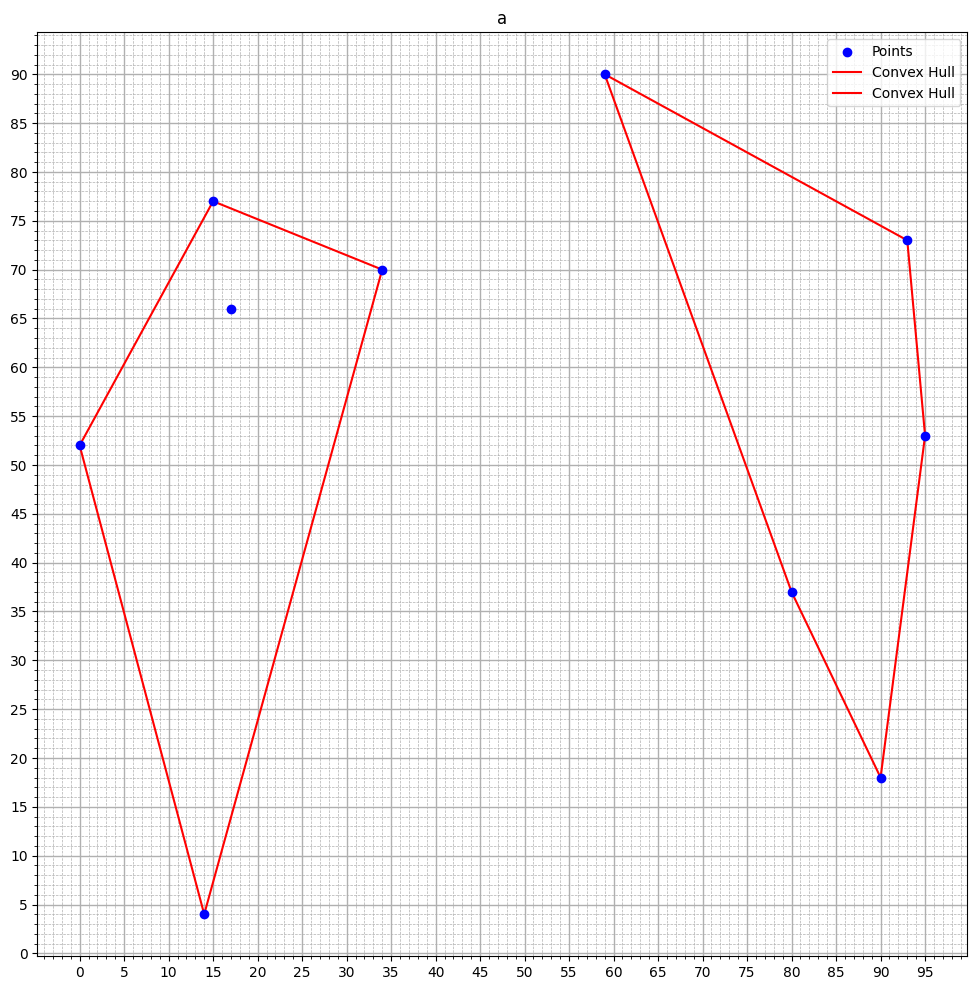

In [39]:
# print(list(choice))
# print(list(choiceA))
# print(list(choiceB))

print(polar_angle_sort(hullA,min(hullA,key=lambda x: (x[1],x[0]))))

print(polar_angle_sort(hullB,min(hullB,key=lambda x: (x[1],x[0]))))
plot_hull(np.vstack((choiceA,choiceB)),[hullA,hullB],"a")

1.6666554739049098
1.7359450042095235
1.6295521495106193
1.5825604899446553
0.0
1.5707963267948966
1.534448705775876
1.5390609532664388
1.5350972141155728
1.4994888620096063
1.4789502005301591
0.35877067027057225
1.3578579772154995
0.4182243295792291
1.2765617616837088
1.4416490366668766
1.3909428270024184
0.9179496956941223
1.2090670852749643
1.346085158380254
1.360613740132727
1.1273479903751584
1.1866269624022971
0.27829965900511133
1.3575918074054423
0.17985349979247828
1.2306992072851342
1.3308301530162505
1.342522553556844
0.16514867741462683
1.3045442776439713
1.176005207095135
1.1983978801181423
1.135113453763956
1.178035661157575
1.2737321144538538
1.0652152719206915
1.2356237596581634
1.1945543161575232
0.060532019782107135
1.1071487177940904
1.2167988899630005
0.7994817392203085
0.8988331552046647
0.8621700546672264
1.1071487177940904
0.6177557255662326
0.9907935525872157
0.9907935525872157
0.6055446636049701
0.3805063771123649
1.1832725210146178
0.04874185130993159
1.040947

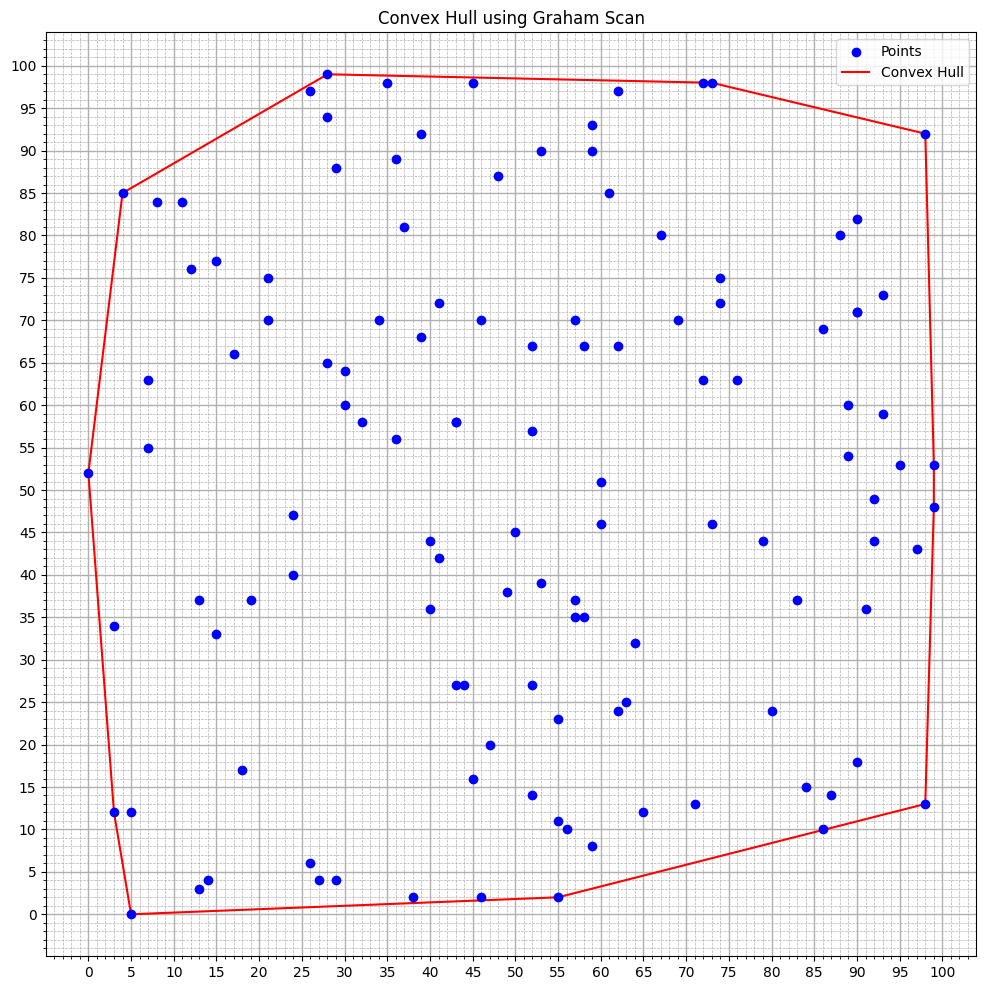

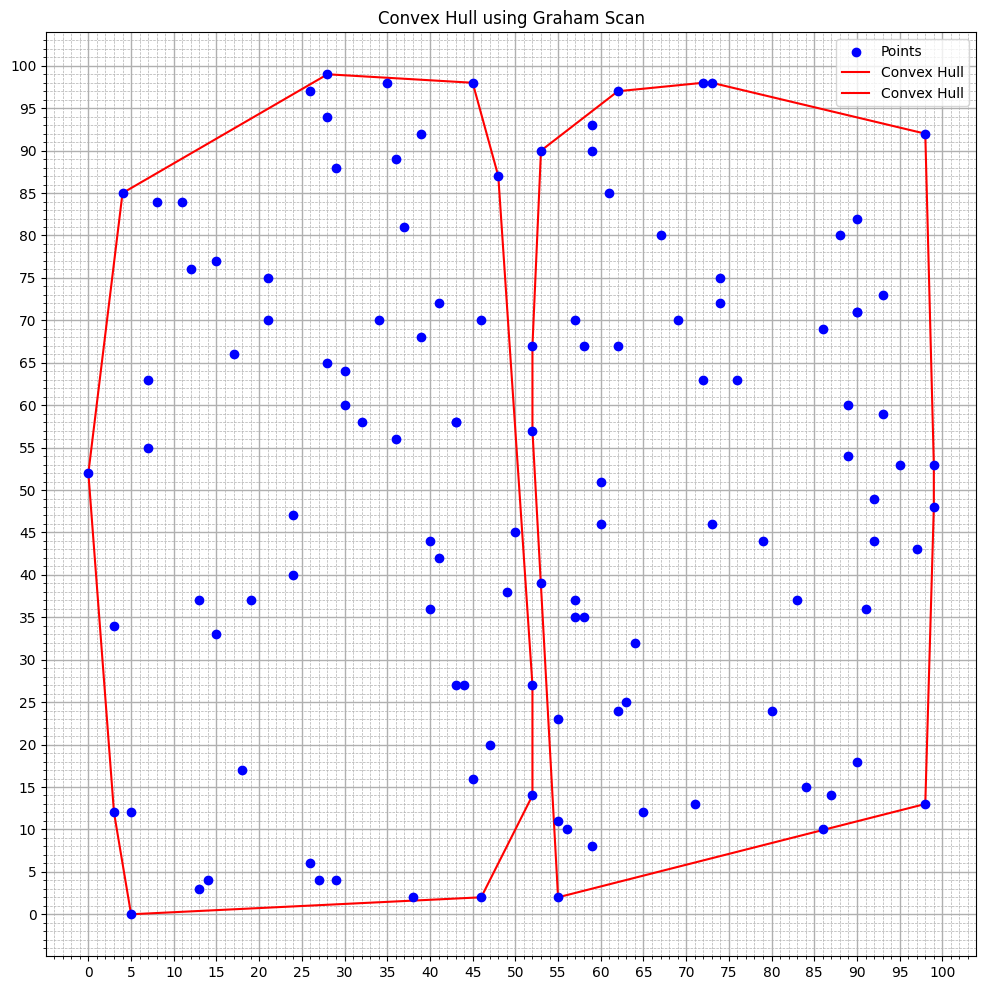

dc_hull:
 [[ 4 85]
 [ 5  0]]
dc_hull:
 [[ 5 12]
 [ 7 55]]
tangents hull_left:
 [[ 4 85]
 [ 5  0]]
tangents hull_right:
 [[ 5 12]
 [ 7 55]]
1.5825604899446553
0.0
0.0
1.5243181954438936
tangents A:
 [[ 5  0]
 [ 4 85]]
tangents B:
 [[ 5 12]
 [ 7 55]]
finding upper tangent
B[j], B[jj], A[i]: [ 5 12] [ 7 55] [ 4 85]
finding lower tangent
delete B: [ 5 12]
merge upper:
 [[ 4 85]
 [ 7 55]]
merge lower:
 [[ 5  0]
 [ 7 55]]
merge A:
 [[ 5  0]
 [ 4 85]]
merge B:
 [[ 7 55]]
merge hull:
 [[ 5  0]
 [ 4 85]
 [ 7 55]]
dc_hull:
 [[ 0 52]
 [ 3 12]
 [ 3 34]]
dc_hull:
 [[ 5  0]
 [ 4 85]
 [ 7 55]]
tangents hull_left:
 [[ 0 52]
 [ 3 12]
 [ 3 34]]
tangents hull_right:
 [[ 5  0]
 [ 4 85]
 [ 7 55]]
1.6456561745056635
0.0
1.5707963267948966
0.0
1.5825604899446553
1.534448705775876
tangents A:
 [[ 3 12]
 [ 3 34]
 [ 0 52]]
tangents B:
 [[ 5  0]
 [ 7 55]
 [ 4 85]]
finding upper tangent
delete A: [ 3 34]
finding lower tangent
merge upper:
 [[ 0 52]
 [ 4 85]]
merge lower:
 [[ 3 12]
 [ 5  0]]
merge A:
 [[ 3 12]
 [ 

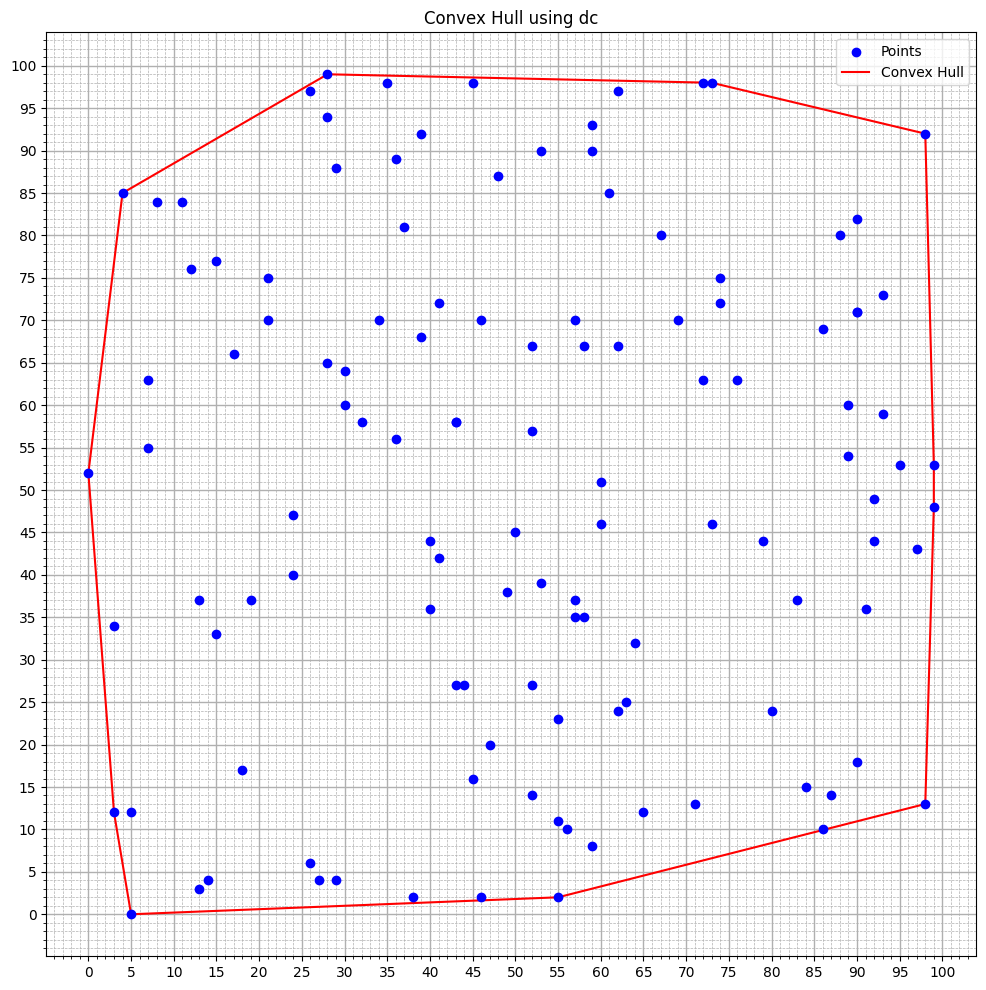

In [54]:
def tangent(hull_left, hull_right, reverse=False):
        n, m = hull_left.shape[0], hull_right.shape[0]
        i, j = -1, 0
        p = hull_left[0]
        A = polar_angle_sort(hull_left,p,clockwise=reverse)
        i = np.argmax(A[:,0])
        q = hull_right[0]
        B = polar_angle_sort(hull_right,q,clockwise=reverse)
        j = np.argmin(B[:,0])
        deleteA, deleteB = [], []
        while True:
            old_i, old_j = i, j
            ii = (i+1) % n
            iii = (i-1) % n
            if n>2 and orientation(A[i], A[ii],B[j])*orientation(A[i], A[ii],A[iii]) <=0: #if cw or colinear
                # print("a pop",A.pop(i))
                deleteA.append(i)
                i = ii
                # n -= 1
            jj = (j - 1) % m
            jjj = (j + 1) % m
            print
            if m>2 and orientation(B[j], B[jj], A[i])*orientation(B[j],B[jj], B[jjj]) <=0: #if ccw or colinear
                deleteB.append(j)
                j = jj
            if i == old_i and j == old_j:
                break
        # return np.array([A[i],B[j]]), deleteA, deleteB
        return np.array([A[i],B[j]]), np.delete(A,deleteA,axis=0), np.delete(B,deleteB,axis=0)

def divide_and_conquer_hull(points):
    def tangents(hull_left, hull_right):
        print("tangents hull_left:\n",hull_left)
        print("tangents hull_right:\n",hull_right)
        lowermostL = min(hull_left,key=lambda x: (x[1],x[0]))
        lowermostR = min(hull_right,key=lambda x: (x[1],x[0]))
        A = polar_angle_sort(hull_left, lowermostL)
        B = polar_angle_sort(hull_right, lowermostR)  
        print("tangents A:\n",A)
        print("tangents B:\n",B)
        n, m = A.shape[0], B.shape[0]
        startA, startB = np.argmax(A[:,0]), np.argmin(B[:,0])
        upper_tangent = []
        lower_tangent = []
        deletionsA = []
        deletionsB=[]
        while not upper_tangent or not lower_tangent:
            # upper_i = startA
            # upper_j = startB
            # upper_ii = (upper_i + 1) % n
            # upper_jj = (upper_j - 1) % m
            # lower_i = startA
            # lower_j = startB
            # lower_ii = (lower_i - 1) % n
            # lower_jj = (lower_j + 1) % m
            i = startA
            j = startB
            ii = (i + 1) % n
            jj = (j - 1) % m
            print("finding upper tangent")
            counterB = 0
            counterA = 0
            while not upper_tangent:    
                # old_i = upper_i
                old_i = i
                # old_j = upper_j
                old_j = j
                while counterB<= len(B) and orientation(B[jj],B[j],A[i]) <= 0:
                    print("B[j], B[jj], A[i]:",B[j],B[jj],A[i])
                    if j != startB:
                        print("delete B:",B[j])
                        deletionsB.append(j)    
                    j = jj
                    jj = (j - 1) % m
                    counterB += 1
                while counterA <= len(A) and orientation(B[j],A[i],A[ii]) <= 0:
                    if i != startA:
                        print("delete A:",A[i])
                        deletionsA.append(i)
                    i = ii
                    ii = (i + 1) % n
                    counterA += 1
                if old_i == i and old_j == j:
                    upper_tangent = [A[i],B[j]]
                    # print("upper tangent:",upper_tangent)
            i = startA
            j = startB
            ii = (i - 1) % n
            jj = (j + 1) % m
            print("finding lower tangent")
            counterB = 0
            counterA = 0
            while not lower_tangent:    
                old_i = i
                old_j = j
                while counterB <= len(B) and orientation(B[jj],B[j],A[i]) >= 0:
                    # print(upper_tangent)
                    # print(B[j])
                    # print(B[j] in upper_tangent)
                    if not (np.array_equal(B[j],upper_tangent[0]) or np.array_equal(B[j],upper_tangent[1])):
                        print("delete B:",B[j])
                        deletionsB.append(j)
                    j = jj
                    jj = (j + 1) % m
                    counterB += 1
                while counterA <= len(A) and orientation(B[j],A[i],A[ii]) >= 0:
                    if not (np.array_equal(A[i],upper_tangent[0]) or np.array_equal(A[i],upper_tangent[1])):
                        print("delete A:",A[i])
                        deletionsA.append(i)
                    i = ii
                    ii = (i - 1) % n
                    counterA += 1
                if old_i == i and old_j == j:
                    lower_tangent = [A[i],B[j]]    
        return np.array(upper_tangent), np.array(lower_tangent), np.delete(A,deletionsA,axis=0), np.delete(B,deletionsB,axis=0)

    def merge(left, right):
        upper_tangent, lower_tangent, A, B = tangents(left, right)
        print("merge upper:\n",upper_tangent)
        print("merge lower:\n",lower_tangent)
        print("merge A:\n",A)
        print("merge B:\n",B)
        hull = np.vstack((A,B))
        print("merge hull:\n",hull)
        return hull

    def dc_hull(points):
        if points.shape[0] <= 3:
            return points
            # return graham_scan(points)
        # print(points)
        mid = points.shape[0] // 2
        left = dc_hull(points[:mid])
        right = dc_hull(points[mid:])
        print("dc_hull:\n",left)
        print("dc_hull:\n",right)
        # return 0
        # print(left)
        # print(right)
        return merge(left, right)
    # hullA = graham_scan(choiceA)
    # hullB = graham_scan(choiceB)
    # upper, lower, A, B = tangents(hullA, hullB)
    # return upper, lower, A, B
    sorted_points = points[np.lexsort((points[:, 1], points[:, 0]))]
    hull = dc_hull(sorted_points)
    # print("return form dc_hull:\n",hull)
    hull = polar_angle_sort(hull,min(hull,key=lambda x: (x[1],x[0])))
    return hull
# hull = divide_and_conquer_hull(choice)
# plot_hull(choice, hull, 'Convex Hull using Divide and Conquer')

# print(upper)
# print(lower)
# print(A)
# print(B)
hullA = graham_scan(choiceA)
hullB = graham_scan(choiceB)
# upper, lower, A, B = divide_and_conquer_hull(choice)
# hull = np.vstack((A,B))
# hull = polar_angle_sort(hull,min(hull,key=lambda x: (x[1],x[0])))
hull = graham_scan(choice)
plot_hull(choice, hull, 'Convex Hull using Graham Scan')
plot_hull(choice, [hullA,hullB], 'Convex Hull using Graham Scan')
hull = divide_and_conquer_hull(choice)
plot_hull(choice, hull, 'Convex Hull using dc')

Αλγόριθμος QuickHull

In [114]:
def quickhull(points):
    def distance(p1, p2, p):
        return np.abs(np.cross(p2 - p1, p - p1) / np.linalg.norm(p2 - p1))

    def find_hull(points, p1, p2, side):
        dists = np.array([distance(p1, p2, p) for p in points])
        if len(dists) == 0:
            return []

        furthest = points[np.argmax(dists)]
        mask = np.cross(p2 - p1, points - p1) > 0 if side else np.cross(p2 - p1, points - p1) < 0
        new_points = points[mask]

        if len(new_points) == 0:
            return [furthest]

        return (find_hull(new_points, p1, furthest, side) +
                find_hull(new_points, furthest, p2, side))

    points = np.array(points)
    min_idx, max_idx = np.argmin(points[:, 0]), np.argmax(points[:, 0])
    p1, p2 = points[min_idx], points[max_idx]

    left_points = points[np.cross(p2 - p1, points - p1) > 0]
    right_points = points[np.cross(p2 - p1, points - p1) < 0]

    hull_left = find_hull(left_points, p1, p2, True)
    hull_right = find_hull(right_points, p1, p2, False)

    hull = np.array([p1] + hull_left + [p2] + hull_right)

    return hull

## Performance Comparison

In [ ]:
def compare_algorithms(points, num_points):
    algorithms = [
        ("Graham's Scan", graham_scan),
        ("Gift Wrapping", gift_wrapping),
        ("Divide and Conquer", divide_and_conquer_hull),
        ("Quickhull", quickhull)
    ]
    
    results = []
    
    for name, algo in algorithms:
        start_time = time()
        hull = algo(points)
        end_time = time()
        
        execution_time = end_time - start_time
        results.append((name, execution_time, hull))
        
        plot_hull(points, [hull], f"{name} - {num_points} points")
    
    return results

def create_comparison_table(all_results):
    table = PrettyTable()
    table.field_names = ["Algorithm"] + [f"{n} points" for n in all_results.keys()]
    
    for algo in ["Graham's Scan", "Gift Wrapping", "Divide and Conquer", "Quickhull"]:
        row = [algo]
        for n in all_results.keys():
            time = next(r[1] for r in all_results[n] if r[0] == algo)
            row.append(f"{time:.6f}s")
        table.add_row(row)
    
    return table

## Run Comparison

In [ ]:
point_counts = [10, 20, 40, 80, 120]
all_results = {}

for n in point_counts:
    points = all_points[:n]
    all_results[n] = compare_algorithms(points, n)

comparison_table = create_comparison_table(all_results)
print(comparison_table)

## Analysis

Based on the results above, we can draw the following conclusions:

1. [Analyze which algorithm performs best for small inputs]
2. [Analyze which algorithm performs best for large inputs]
3. [Discuss how the performance of each algorithm scales with input size]
4. [Mention any unexpected results or interesting observations]

Remember that the actual performance may vary depending on the specific input points and the hardware used to run the algorithms.